###  正规方程计算

#### 简单线性回归（一个系数，变量

In [8]:
import numpy as np
import matplotlib.pyplot as plt

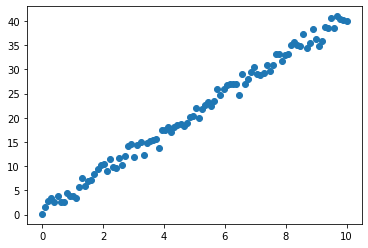

In [9]:
# 转化成矩阵，reshape
X = np.linspace(0,10,num = 100).reshape(-1,1)
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 1)
b = np.random.randint(1,10,size = 1)

# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
# 目标值y真实值！！！
y = X * w + b + np.random.randn(100,1)


plt.scatter(X,y)

一元一次方程真实的斜率和截距是： [4] [1]
通过正规方程求解的斜率和截距是： [[4.01]
 [1.01]]


ValueError: x and y must be the same size

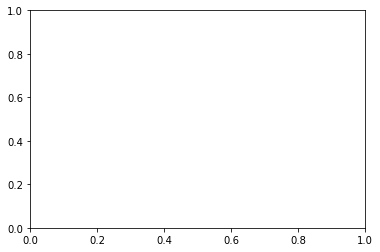

In [10]:
# 重新构造X，b截距，相当于系数w0，前面统一乘以1
X = np.concatenate([X,np.full(shape = (100,1),fill_value= 1)],axis = 1)

# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

print('一元一次方程真实的斜率和截距是：',w, b)
print('通过正规方程求解的斜率和截距是：',θ)

# 根据求解的斜率和截距绘制线性回归线型图
plt.scatter(X,y)
plt.plot(X[:,0],X.dot(θ),color = 'green')

#### 复杂多元一次方程（二元举例，画图）

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D # 绘制三维图像

In [12]:
# 转化成矩阵
x1 = np.random.randint(-150,150,size = (300,1))
x2 = np.random.randint(0,300,size = (300,1))

# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 2)
b = np.random.randint(1,10,size = 1)

# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300,1)

二元一次方程真实的斜率和截距是： [4 1 7]
通过正规方程求解的斜率和截距是： [4.   1.   7.15]


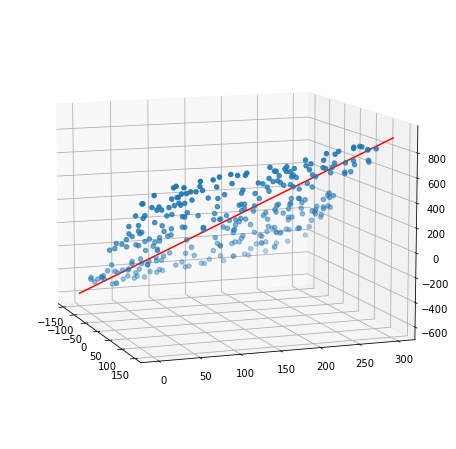

In [13]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,projection = '3d')
ax.scatter(x1,x2,y) # 三维散点图
ax.view_init(elev=10, azim=-20) # 调整视角

# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1,x2,np.full(shape = (300,1),fill_value=1)],axis = 1)
w = np.concatenate([w,b])
# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

print('二元一次方程真实的斜率和截距是：',w)
print('通过正规方程求解的斜率和截距是：',θ.reshape(-1))

# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150,150,100)
y = np.linspace(0,300,100)
z = x * θ[0] + y * θ[1] + θ[2]
ax.plot(x,y,z ,color = 'red')

###  sklearn线性回归

#### 简单线性回归

一元一次方程真实的斜率和截距是： [1] [4]
通过scikit-learn求解的斜率和截距是： [[0.99084517]] [4.36971879]


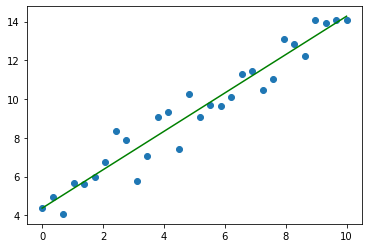

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# 转化成矩阵
X = np.linspace(0,10,num = 30).reshape(-1,1)
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 1)
b = np.random.randint(1,10,size = 1)
# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = X * w + b + np.random.randn(30,1)
plt.scatter(X,y)

# 使用scikit-learn中的线性回归求解
model = LinearRegression()
model.fit(X,y)

w_ = model.coef_
b_ = model.intercept_
print('一元一次方程真实的斜率和截距是：',w, b)
print('通过scikit-learn求解的斜率和截距是：',w_,b_)
plt.plot(X,X.dot(w_) + b_,color = 'green')

#### 复杂线性回归（二元）

二元一次方程真实的斜率和截距是： [2 4] [6]
通过scikit-learn求解的斜率和截距是： [2.0004161  4.00119734] [5.79455427]


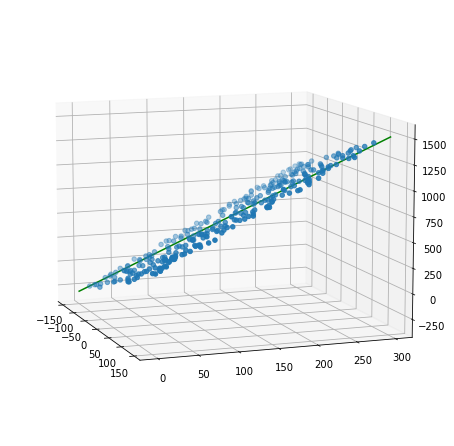

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# 转化成矩阵
x1 = np.random.randint(-150,150,size = (300,1))
x2 = np.random.randint(0,300,size = (300,1))
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 2)
b = np.random.randint(1,10,size = 1)
# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300,1)

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x1,x2,y) # 三维散点图
ax.view_init(elev=10, azim=-20) # 调整视角


# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1,x2],axis = 1)
# 使用scikit-learn中的线性回归求解
model = LinearRegression()
model.fit(X,y)
w_ = model.coef_.reshape(-1)
b_ = model.intercept_


print('二元一次方程真实的斜率和截距是：',w,b)
print('通过scikit-learn求解的斜率和截距是：',w_,b_)
# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150,150,100)
y = np.linspace(0,300,100)
z = x * w_[0] + y * w_[1] + b_
ax.plot(x,y,z ,color = 'green')

### 线性回归房价预测

In [1]:
# 房价跟一些列有关系：面积、位置、房间布局……
import numpy as np

from sklearn import datasets

from sklearn.linear_model import LinearRegression

#### 加载数据

In [2]:
boston = datasets.load_boston()

X = boston['data'] # 数据，这些数据影响了房价，统计指标
y = boston['target'] # 房价，24表示24万美金

# CRIM 犯罪
# NOX 空气污染
# TAX 税收
# 这些指标都和房价有关系
feature_names = boston['feature_names'] # 具体指标
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

#### 数据查看

In [4]:
# 506表示506统计样本
# 影响房价的13个属性
X.shape
# 506个房子，对应着506价格
# X ---> y一一对应
# 数据--->目标值对应
y.shape


(506,)

#### 数据拆分

In [5]:
# 506个数据、样本
# 拆分成两份：一份80%，训练数据；20%，验证数据
# 拿出其中的80%，交给算法，线性回归，学习、总结、拟合函数
# 20%，作用：验证，测一测，看看算法，学习80%结束，是否准确！
index = np.arange(506)
np.random.shuffle(index)

train_index = index[:405]
test_index = index[405:]

In [6]:
# 80% 训练数据
X_train = X[train_index]
y_train = y[train_index]
display(X_train.shape,y_train.shape)


(405, 13)

(405,)

In [7]:
# 20% 测试数据
X_test = X[test_index]
y_test = y[test_index]

display(X_test.shape,y_test.shape)

(101, 13)

(101,)

#### 数据建模（model本质就是方程）

In [8]:
np.set_printoptions(suppress = True)

model = LinearRegression(fit_intercept = True)

# 如何构建，模：算法、方程
# 考试，做过的题
model.fit(X_train,y_train)

# 建模获取了斜率，有大有小，有正有负，表示什么？
# 正：正相关，面积，越大，房价越高
# 负：刚好相反，犯罪率，环境污染
display(model.coef_,model.intercept_)

array([ -0.12382619,   0.057438  ,   0.05690355,   1.31507622,
       -18.31136   ,   3.38987697,   0.00224122,  -1.53659398,
         0.39503911,  -0.01741597,  -1.00881979,   0.00824242,
        -0.52499474])

41.59418461264338

In [9]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### 模型验证、应用

In [10]:
# 模型预测结果：y_
y_ = model.predict(X_test).round(2)
y_[:30]

array([ 5.11, 13.9 , 18.98, 17.44, 25.39, 32.17,  9.03,  8.73, 10.97,
       13.28, 33.94, 22.9 , 18.08, 24.46, 28.09, 16.2 , 24.74, 18.41,
       16.37, 28.09, 27.4 , 29.58, 19.45, 22.77,  1.45, 33.35, 18.81,
       16.6 , 21.95, 24.17])

In [11]:
y_test[:30]

array([ 8.4, 19.7, 19.9, 17.3, 21.6, 31.6,  8.7, 11.9,  6.3, 12.3, 34.9,
       22. , 16.6, 24.7, 28. , 13.3, 26.5, 20. , 20.6, 31.2, 23.9, 34.9,
       16.7, 33. , 13.8, 36.1, 18.3, 13.4, 22.2, 20.5])

#### 模型评估

In [12]:
# 判断一下，训练数据 80%的数据的评分
# 为什么使用，训练数据，评分高？？？
# 做过题目，再次参加考试，分数高
model.score(X_train,y_train)

0.7453215608586008

In [13]:
# 最大值，是1，小于0
# 模型特别不好，那么评分可以是负数
# 这个指标越接近1，说明算法越优秀~
# 相当于，没见过题目，新题
model.score(X_test,y_test)

0.7133504111961455

In [14]:
# 最小二乘法
from sklearn.metrics import mean_squared_error

In [18]:
y_pred = model.predict(X_test)
y_true = y_test

In [19]:
# 这个是测试数据，验证数据，表现，误差
# 对应那20%
mean_squared_error(y_true,y_pred)

31.61017564128534

In [20]:
# 80% 训练，表现
mean_squared_error(y_train,model.predict(X_train))

19.851920204571332